<a href="https://colab.research.google.com/github/bagastri07/Tugas1_Machine_Learning/blob/main/Tugas1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tugas ML Bagian 1
##Clustering Menggunakan K-Means

**Author**: \
Bagas Tri Wibowo \
1301194051 \
IF-43-04

**Permasahan**\
Mengelompokkan data pelanggan dealer tanpa memperhatikan label kelas apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak. 

## Library

In [66]:
#Import Library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Import CSV Data

**Permasalahan**
mengelompokkan pelanggan berdasarkan data pelanggan di dealer tanpa memperhatikan label kelas apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak.

In [67]:
#Import dataset
df_train = pd.read_csv('https://github.com/bagastri07/Tugas1_Machine_Learning/blob/main/kendaraan_train.csv?raw=true')

In [68]:
#Melihat isi data
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


## Data Processing

Drop kolom id karena kolom ini tidak digunakan

In [69]:
df_train = df_train.drop(['id'], axis=1)

#### Mengelola Missing Value



Memeriksa apakah terdapat missing value

In [70]:
#Memeriksa apakah terdapat missing value atau nilai NaN
df_train.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Drop Missing value

In [71]:
#Drop missing value
df_train = df_train.dropna()

Kembali memeriksa apakah terdapat missing value atau tidak

In [72]:
#Memeriksa apakah masih terdapat missing value
df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

#### Memeriksa Data Duplicated

Melihat apakah ada data yang duplicated

In [73]:
df_train.duplicated().sum()

51

Karena ada duplikat data sebanyak 51 buah, maka data ini akan dibersihkan dengan menghapus data yang duplikat dengan mempertahankan data yang paling atas dari data duplikt

In [74]:
df_train = df_train.drop_duplicates(keep='first')

Sekarang kita periksa kembali apakah data masih terdapat duplicate value

In [75]:
df_train.duplicated().sum()

0

Seperti diliat di atas data bersih dari data duplicated

####Eksplorasi data

Melihat statistik dasar data numeric

In [76]:
#Melihat statistik dasar
df_train.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,171017.000000,171017.00000,171017.000000,171017.000000,171017.000000,171017.000000,171017.000000,171017.000000
mean,38.818667,0.99793,26.411298,0.459791,30515.060573,112.256700,154.249876,0.121596
std,15.532358,0.04545,13.262164,0.498382,17086.175432,54.108259,83.862904,0.326820
min,20.000000,0.00000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.00000,15.000000,0.000000,24376.000000,29.000000,81.000000,0.000000
50%,36.000000,1.00000,28.000000,0.000000,31607.000000,140.000000,154.000000,0.000000
75%,49.000000,1.00000,35.000000,1.000000,39328.000000,152.000000,227.000000,0.000000
max,85.000000,1.00000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Melihat statistik dasar data Kategorial

In [77]:
#Melihat statistik dasar
df_train.describe(include='object')

,Jenis_Kelamin,Umur_Kendaraan,Kendaraan_Rusak
count,171017,171017,171017
unique,2,3,2
top,Pria,1-2 Tahun,Pernah
freq,92455,89634,86269


Melihat Korelasi Antar Kolom

In [78]:
#Melihat korelasi antara kolom
df_train.corr(method='pearson').abs()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Umur,1.000000,0.078550,0.044250,0.256843,0.063815,0.576004,0.001054,0.108908
SIM,0.078550,1.000000,0.005863,0.016461,0.012847,0.041577,0.001737,0.008678
Kode_Daerah,0.044250,0.005863,1.000000,0.024423,0.012464,0.043971,0.003797,0.011149
Sudah_Asuransi,0.256843,0.016461,0.024423,1.000000,0.004001,0.221578,0.002909,0.340738
Premi,0.063815,0.012847,0.012464,0.004001,1.000000,0.112249,0.001199,0.021807
Kanal_Penjualan,0.576004,0.041577,0.043971,0.221578,0.112249,1.000000,0.000883,0.140919
Lama_Berlangganan,0.001054,0.001737,0.003797,0.002909,0.001199,0.000883,1.000000,0.002132
Tertarik,0.108908,0.008678,0.011149,0.340738,0.021807,0.140919,0.002132,1.000000


Korelasi data dengan visual Heatmap

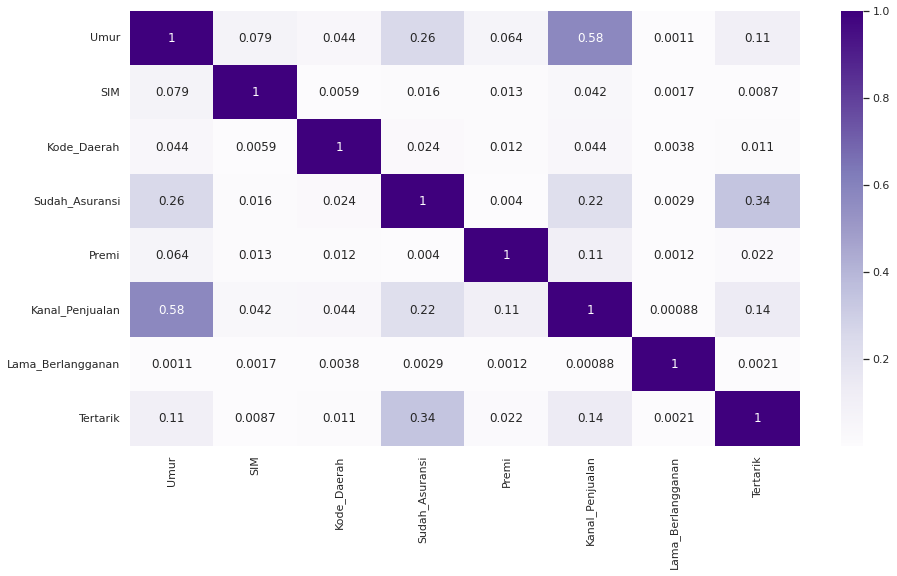

In [79]:
#Melihat korelasi dengan bantuan heatmap
df_numeric = df_train.select_dtypes(exclude=['object'])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_numeric.corr().abs(), cmap="Purples", annot=True)



#### Mengubah Data Kategorial menjadi data numeric

Proses mengubah data kategorial menjadi nilai numeric

In [80]:
#Mengubah ke array agar bisa mengubah nilai kategorial menjadi nilai numeric
df_train_conv = df_train.copy()
arr = [df_train_conv]

In [81]:
#Mengubah Data Kategorial umur kendaraan
for ds in arr:    
  ds.loc[(ds['Umur_Kendaraan'] == '< 1 Tahun'), 'Umur_Kendaraan'] = 0
  ds.loc[(ds['Umur_Kendaraan'] == '1-2 Tahun'), 'Umur_Kendaraan'] = 1
  ds.loc[(ds['Umur_Kendaraan'] == '> 2 Tahun'), 'Umur_Kendaraan'] = 2

In [82]:
#Mengubah Data Kategorial Kendaraan Rusak
for ds in arr:    
  ds.loc[(ds['Kendaraan_Rusak'] == 'Tidak'), 'Kendaraan_Rusak'] = 0
  ds.loc[(ds['Kendaraan_Rusak'] == 'Pernah'), 'Kendaraan_Rusak'] = 1

In [83]:
#Mengubah Data Kategorial Jenis Kelamin
for ds in arr:    
  ds.loc[(ds['Jenis_Kelamin'] == 'Pria'), 'Jenis_Kelamin'] = 0
  ds.loc[(ds['Jenis_Kelamin'] == 'Wanita'), 'Jenis_Kelamin'] = 1

In [84]:
#Melihat hasil konversi data kategorial menjadi numeric
df_train_conv.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
5,0,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0
8,1,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0,0


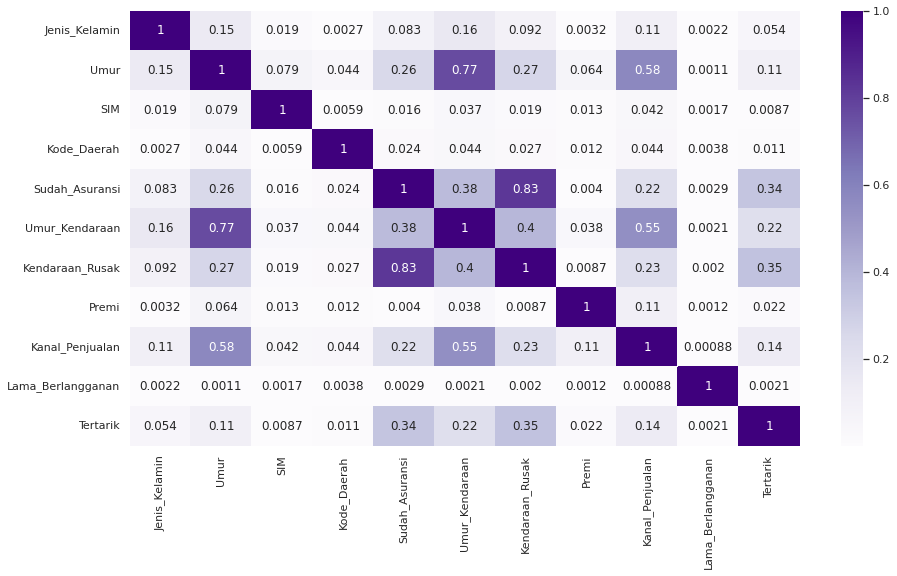

In [85]:
#Menampilkan Kembali Korelasi
df_train_conv['Umur_Kendaraan'] = df_train_conv['Umur_Kendaraan'].astype(float)
df_train_conv['Kendaraan_Rusak'] = df_train_conv['Kendaraan_Rusak'].astype(float)
df_train_conv['Jenis_Kelamin'] = df_train_conv['Jenis_Kelamin'].astype(float)
sns.heatmap(df_train_conv.corr().abs(), cmap="Purples", annot=True)

#### Memilih Data Yang Digunakan

Memilih kolom yang memiliki korelasi tinggi. Disini saya memilih Umur, Sudah_Asuransi, Kendaraan_Rusak, Kanal_Penjualan, Umur_kendaraan, dan Jenis_Kelamin

Melihat hasil slice data

In [86]:
#Memilih kolom yang digunakan untuk klastering
#df_train_slice = df_train[['Umur', 'Sudah_Asuransi', 'Kendaraan_Rusak', 'Kanal_Penjualan', 'Umur_Kendaraan'], 'Jenis_Kelamin']
df_train_slice = df_train_conv[['Umur_Kendaraan', 'Kanal_Penjualan', 'Kendaraan_Rusak', 'Umur']]


In [87]:
#Menampilkan hasil slice
df_train_slice.head()

,Umur_Kendaraan,Kanal_Penjualan,Kendaraan_Rusak,Umur
0,0.0,152.0,0.0,30.0
1,2.0,29.0,1.0,48.0
3,1.0,124.0,0.0,58.0
5,0.0,152.0,0.0,21.0
8,0.0,160.0,0.0,20.0


Melihat Outlier dari kolom data yang telah dipilih dengan bantuan Boxplot

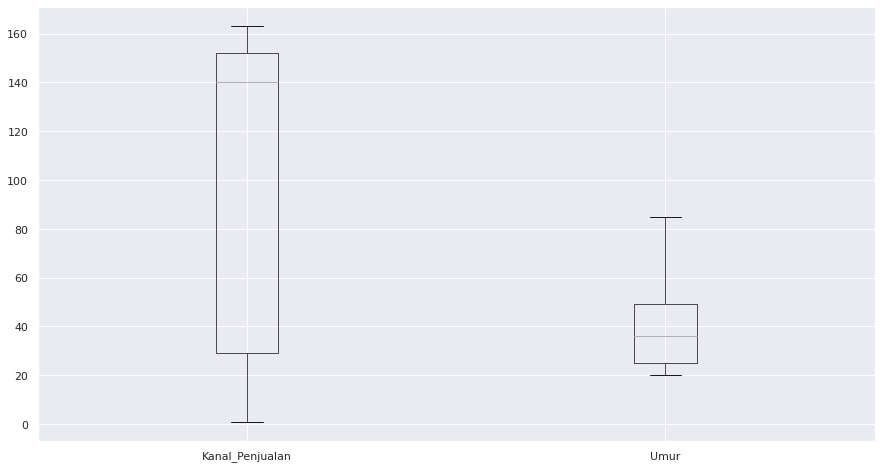

In [88]:
df_train_slice.boxplot(column=['Kanal_Penjualan', 'Umur'])

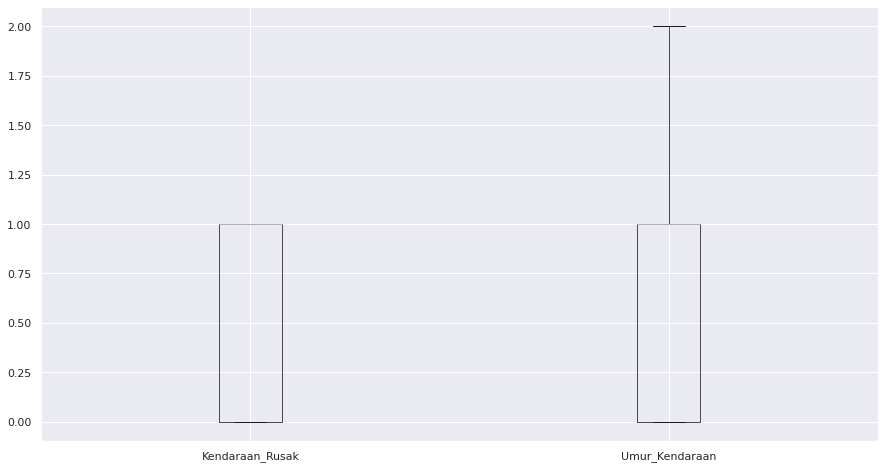

In [89]:
df_train_slice.boxplot(column=['Kendaraan_Rusak', 'Umur_Kendaraan'])

Seperti yang diliat pada boxplot diatas, tidak ada outlier pada 4 kolom yang telah dipilih

#### Normalisasi Data

Normalisasi Data (Maximum Absolute Scaling)

In [90]:
def maximum_absolute_scaling(df):
    # copy dataframe, agar tidak merusak dataframe yang asli
    df_scaled = df.copy()
    # Mengimplementasikan Maximum Absolute Scalling 
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

In [91]:
# Mendapatkan dataframe baru hasil normalisasi menggunakan maximum absolute scaling
df_norm = maximum_absolute_scaling(df_train_slice)

Melihat hasil dari normalisasi data

In [92]:
#Melihat hasil normalisasi
df_norm.head()

,Umur_Kendaraan,Kanal_Penjualan,Kendaraan_Rusak,Umur
0,0.0,0.932515,0.0,0.352941
1,1.0,0.177914,1.0,0.564706
3,0.5,0.760736,0.0,0.682353
5,0.0,0.932515,0.0,0.247059
8,0.0,0.981595,0.0,0.235294


#### Reduksi Dimensi Menggunakan PCA (Principal component analysis)

Melihat dimensi dan jumlah data

In [93]:
df_norm.shape

(171017, 4)

Mereduksi data, dari 4-dimensi menjadi 2-dimensi 

In [94]:
#Disini menggunakan bantuan library sklearn.decomposition
#Menentukan dimensi akhir, disini dipilih 2-dimensi
pca = PCA(n_components=2)

#melakukan proses reduksi dimensi
principalComponents = pca.fit_transform(df_norm)
df_principal = pd.DataFrame(data = principalComponents
             , columns = ['PC A', 'PC B'])

Menampilkan data yang sudah direduksi

In [95]:
#Menampilkan data setelah direduksi
df_principal.head()

,PC A,PC B
0,-0.636802,-0.087282
1,0.848226,0.446352
2,-0.352321,0.344807
3,-0.655696,-0.119404
4,-0.673167,-0.157505


Melihat nilai Variansi dari data setelah direduksi

In [96]:
# Melihat nilai variansi di setiap Principal Component
print('Explained variation per principal component: ', pca.explained_variance_ratio_)

Explained variation per principal component:  [0.61392978 0.27518633]


Menyajikan nilai variansi di masing-masing komponen dengan Bar Plot

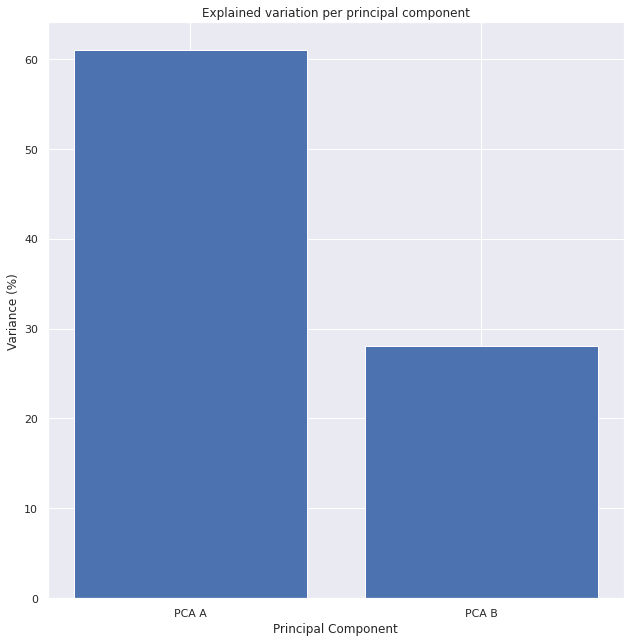

In [97]:
# Menyajikan nilai variansi dengan Bar Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0,0,1,1])
x_label = ['PCA A', 'PCA B']
var = np.round(pca.explained_variance_ratio_*100)
ax.bar(x_label, var)
ax.set_title('Explained variation per principal component')
ax.set_ylabel('Variance (%)')
ax.set_xlabel('Principal Component')
plt.show()

Dapat diliat nilai variansi dari masing-masing PCA di atas:

1.  PCA A : 61.39%
2.  PCA B : 27.51%

Sehingga jika diamati hasil reduksi masih menahan informasi sebesar **88.9%**, yang tersebar sebanyak **61.39%** di PCA A dan **27.51%** di PCA B. Itu juga berarti informasi yang hilang akibat reduksi dimensi hanya sebanyak **11.1%**.



Fungsi untuk menampilkan Scatter Plot Data

In [98]:
#Show_Plot
def plot_data(X):
  plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
  plt.xlabel('PC A')
  plt.ylabel('PC B')
  plt.legend()
  plt.title('Plot of data points')
  plt.show()

Mengubah Pandas Dataframe menjadi Numpy Array agar dapat digunakan di dalam Model K-Means yang dibangun dan menampilkan plot dari data

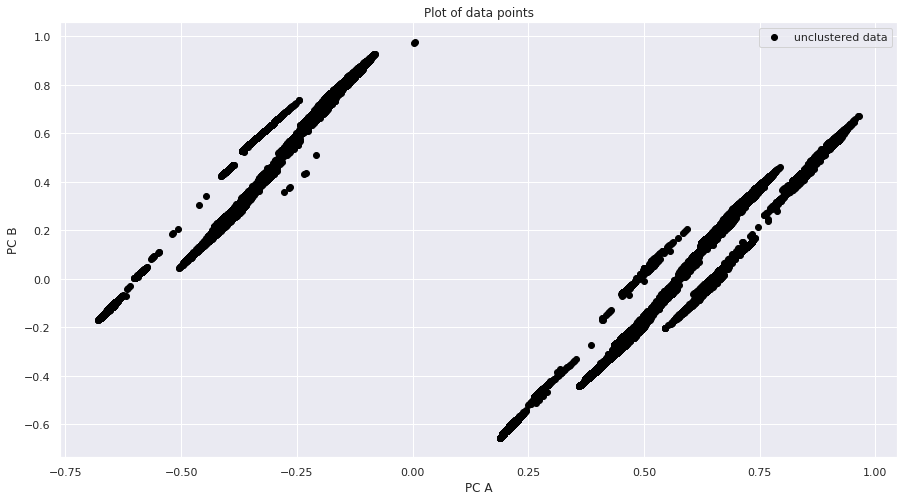

In [99]:
#Mengambil data yang digunakan dan dilakuan reduksi dmensi
X = df_principal.to_numpy()

plot_data(X)



## K - Means Model

Mendifinisikan Class Color untuk memudahkan visualisasi pada model

In [100]:
#class color
class color:
  PURPLE = '\033[95m'
  CYAN = '\033[96m'
  DARKCYAN = '\033[36m'
  BLUE = '\033[94m'
  GREEN = '\033[92m'
  YELLOW = '\033[93m'
  RED = '\033[91m'
  BOLD = '\033[1m'
  UNDERLNE = '\033[4m'
  END = '\033[0m'

Fungsi untuk menentukan random centroid

In [101]:
#Fungsi Menentukan random centroid
def random_centroid(X, k):
  #membuat random k dan titik centroid
  random_idx = [np.random.randint(len(X)) for i in range(k)]
  centroids = []
  for i in random_idx:
    centroids.append(X[i])
  return np.asarray(centroids)

Fungsi untuk menentukan cluster yang tepat berdasarkan nilai dari centroid

In [102]:
#Menentukan titik data masuk ke cluster mana
def assign_cluster(X, ini_centroid, k):
  cluster = [] # untuk menyimpan titik data yang masuk
  for i in range(len(X)):
    euc_dist = [] #menyimpan euclidian distance
    #running k loop
    for j in range(k):
      euc_dist.append(np.linalg.norm(np.subtract(X[i], ini_centroid[j]))) #memasukan array euc dist
    idx = np.argmin(euc_dist) #idx minimum
    cluster.append(idx) #memasukan indeks ke cluster
  return np.asarray(cluster)

Fungsi Untuk meng-update centroid lama dengan centroid baru

In [103]:
#Mengembalikan centroid yang diupdate
def compute_centroid(X, clusters, k):
  centroid = [] #menyimpan nilai centroid
  for i in range(k):
    temp_arr = []
    for j in range(len(X)):
      #memeriksa satu cluster sekaligus dan memeriksa centroids masing-masing di temp_arr
      if clusters[j] == i:
        temp_arr.append(X[j])
    #mengambil maksud di antara titik-titik itu dan menyimpannya di array centroid
    centroid.append(np.mean(temp_arr, axis=0))
  return np.asarray(centroid)

Fungsi untuk mengembalikan nilai perbedaan antara centroid lama dan baru

In [104]:
#mengembalikan perbedaan antara centroid lama dan baru
def difference(prev, next):
  diff = 0
  for i in range(len(prev)):
    diff += np.linalg.norm(prev[i] - next[i])
  return diff

Fungsi untuk menampilkan cluster

In [105]:
#Show Cluster
def show_clusters(X, clusters, centroid, ini_centroids=None, initial=True):
  #Memberikan warna untuk setiap cluster
  cols ={0:'red', 1:'violet' ,2:'mediumpurple' , 3:'greenyellow', 4:'c', 5:'forestgreen', 6:'magenta', 7: 'coral'}

  #Convert centroid menjadi numpy array
  centroid=np.asarray(centroid)
  ini_centroids = np.asarray(ini_centroids)
  #Menghitung jumlah cluster
  u_cluster = np.unique(clusters)

  #Membuat scatter plot di tiap-tiap cluster
  for i in u_cluster:
    #Memberi nama cluster
    cluster_name = 'Cluster ' + str(i+1)
    plt.scatter(X[clusters == i, 0], X[clusters == i , 1] , label = cluster_name, color=cols[i])
  
  #Memberikan tanda untuk initial centroid
  plt.scatter(ini_centroids[:,0],ini_centroids[:,1], marker="*", s=300,c='black',label='Initial Centroids')
  #Memberikan tanda untuk final centroid
  if initial:
    plt.scatter(centroid[:,0],centroid[:,1], marker="*", s=300,c='orange',label='Final Centroids')
  #Memberikan label di sumbu X dan Y
  plt.xlabel('PC A')
  plt.ylabel('PC B')
  plt.legend()
  plt.show()

Model K-Means yang dibangun dengan bantuan fungsi-fungsi diatas

In [106]:
#K means main
#Digunakan untuk Clustering
def k_means(X, k, ini_cent=None, show_plots=True, random=True):
  #Jika menggunakan ini_centroid random
  if random:
    c_prev = random_centroid(X, k)
  else:
    c_prev = ini_cent 
  cluster = assign_cluster(X, c_prev, k)
  diff = 100 #Asumsi difference antara centroid adalah 100
  ini_centroid = c_prev #Menyimpan centroid 

  if show_plots:
    print(color.BOLD+"Note:\nBlack Star -> Initial Centroid\n and Orange Star -> Final Centroid"+color.END)
    print(color.BOLD+'\nInitial Cluster Centers:\n'+color.END)
    print(ini_centroid)
    print(color.BOLD+"\n\nInitial Plot\n"+color.END)
    show_clusters(X, cluster, c_prev, ini_centroid, False)

  #Berhenti saat nilai diff < 0.0001
  while diff > 0.0001:
    cluster = assign_cluster(X, c_prev, k) #Menentukan cluster berdasarkan centroid yang sekarang
    c_new = compute_centroid(X, cluster, k) #Menghitung centroid yang baru
    diff = difference(c_prev, c_new) # Menghitung nilai diff
    c_prev = c_new
  
  #final cluster
  if show_plots:
    print(color.BOLD+'\nFinal cluster centers:\n'+color.END)
    print(c_prev)
    #plotting final plot
    print(color.BOLD+'\nFinal Plot:\n'+color.END)
    show_clusters(X, cluster, c_prev, ini_centroid)
  return cluster, c_prev

## Eksperimen

#### Menggunakan Jumlah Kluster Berdasarkan Pengamatan Visual

Plot menggunakan scatter plot untuk mengetahui persebaran data

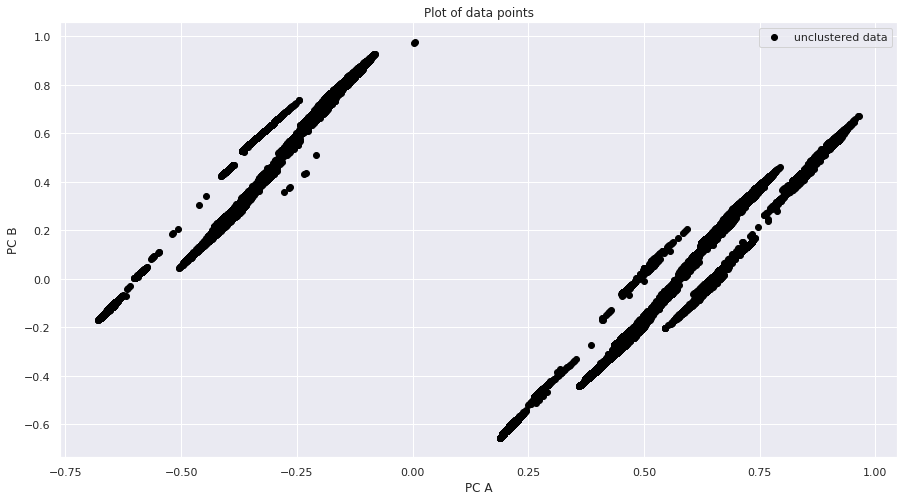

In [ ]:
plot_data(X)

Berdasarkan pengamatan scatter plot, data ini dapat dijadikan sebagai dua Kluster.

Note:
Black Star -> Initial Centroid
 and Orange Star -> Final Centroid

Initial Cluster Centers:

[[ 0.53157794 -0.11075321]
 [ 0.48329262 -0.19284434]]


Initial Plot



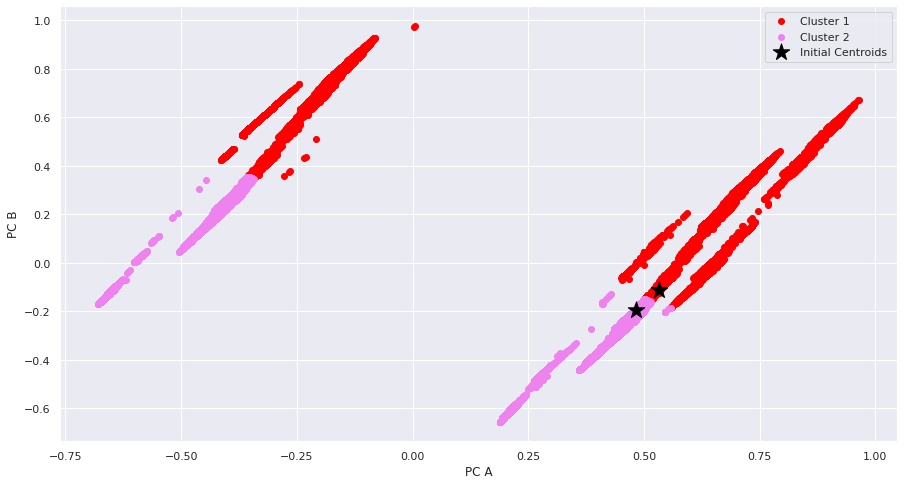


Final cluster centers:

[[ 0.50033533 -0.12521193]
 [-0.50931501  0.12745915]]

Final Plot:



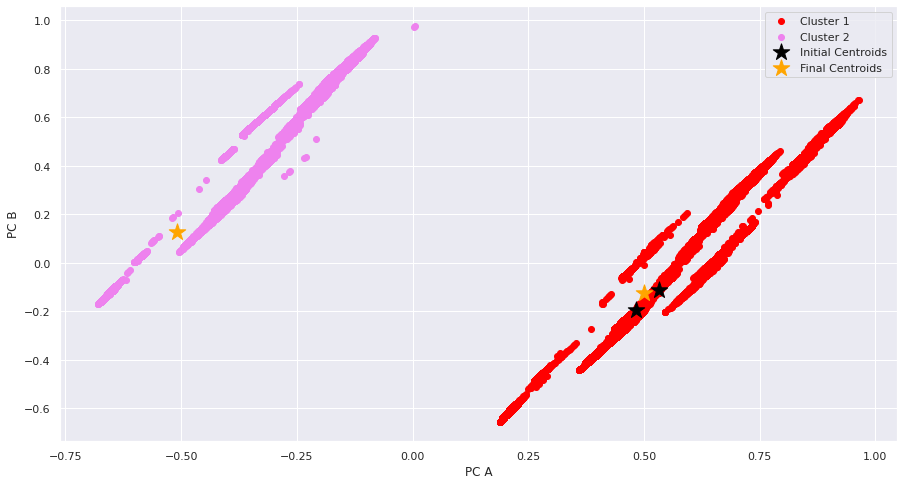

In [ ]:
k = 2
cluster_test1, centroid_test1 = k_means(X, k)

#### Menggunakan Jumlah Kluster berdasarkan Elbow Method

Elbow Method untuk menentukan jumlah kluster yang optimal

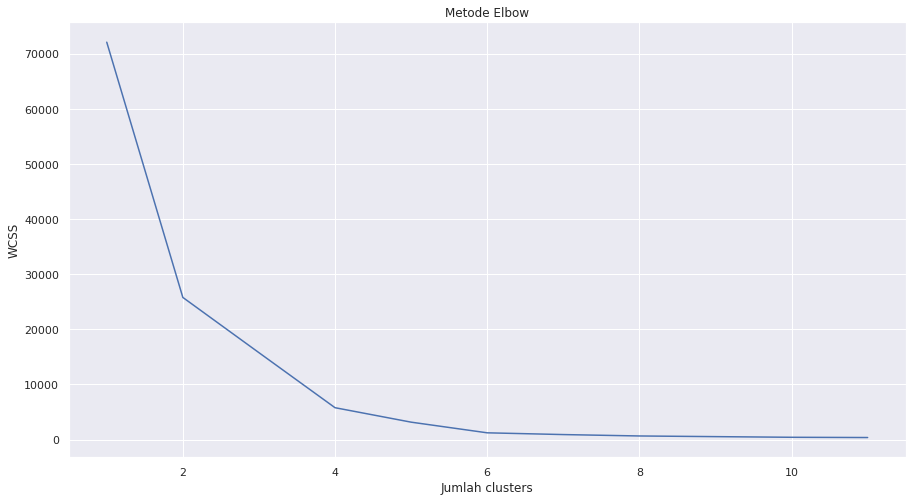

In [ ]:
#Menggunakan metode elbow untuk menentukan angka cluster yang optimal
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 90)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

Berdasarkan elbow method diatas, dapat disimpulkan jumlah kluster yang optimal untuk data ini adalah sebanyak 4 kluster.

Note:
Black Star -> Initial Centroid
 and Orange Star -> Final Centroid

Initial Cluster Centers:

[[ 0.70098525  0.28013174]
 [ 0.21560607 -0.59637979]
 [ 0.8959771   0.53068527]
 [-0.44390962  0.15970259]]


Initial Plot



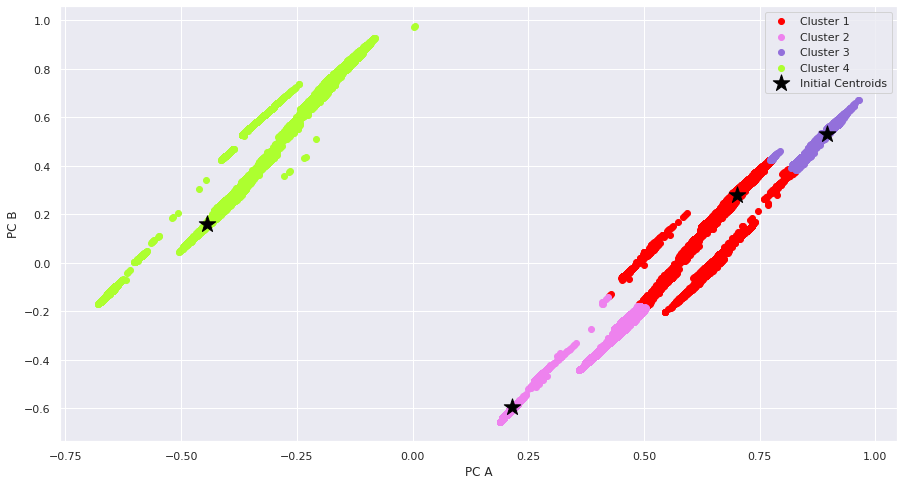


Final cluster centers:

[[ 0.47528593 -0.21191594]
 [ 0.21960038 -0.58958681]
 [ 0.71121618  0.27385744]
 [-0.50931501  0.12745915]]

Final Plot:



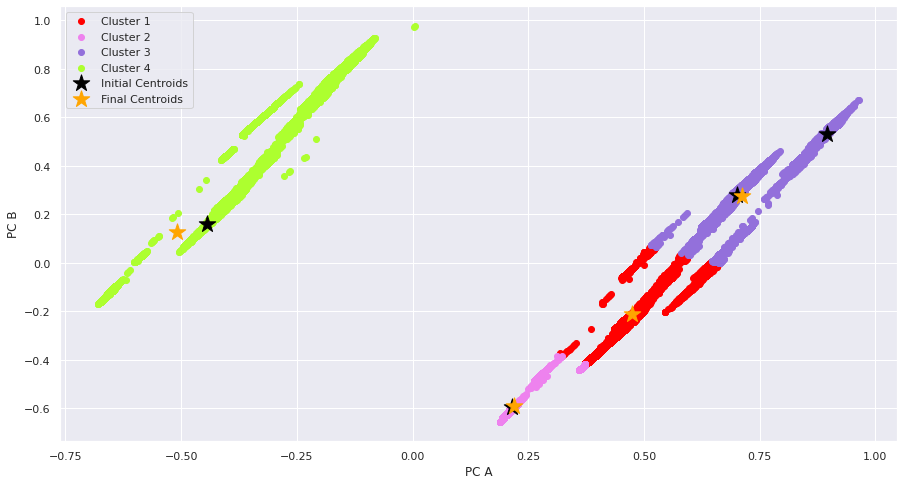

In [ ]:
#Menginisiasikan jumlah clustter sebanyak 4
k = 4
cluster_test2, centroid_test2 = k_means(X, k)

#### Mempercepat Performa K-Means dan Membuat hasil Kluster Lebih Baik Menggunakan Initial Centroids

Karena kekurangan algoritma K-Means adalah sensitif dengan initial centroid, sehingga disini dicoba untuk menentukan initial centroid secara manual, dengan harapan perfoma dan hasil kluster K-Means menjadi lebih baik

Note:
Black Star -> Initial Centroid
 and Orange Star -> Final Centroid

Initial Cluster Centers:

[[-0.5   0.1 ]
 [-0.2   0.7 ]
 [ 0.3  -0.3 ]
 [ 0.75  0.4 ]]


Initial Plot



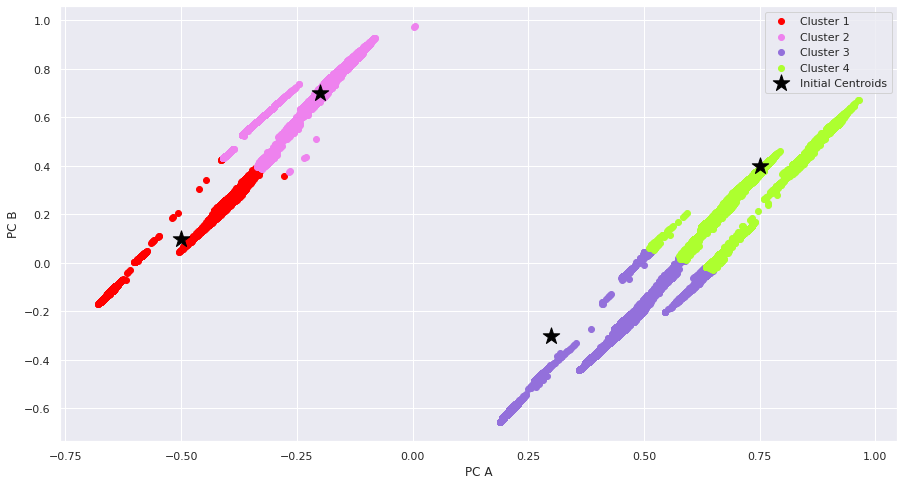


Final cluster centers:

[[-0.63447555 -0.09008107]
 [-0.27519278  0.53438456]
 [ 0.37758219 -0.35603955]
 [ 0.70894805  0.26706789]]

Final Plot:



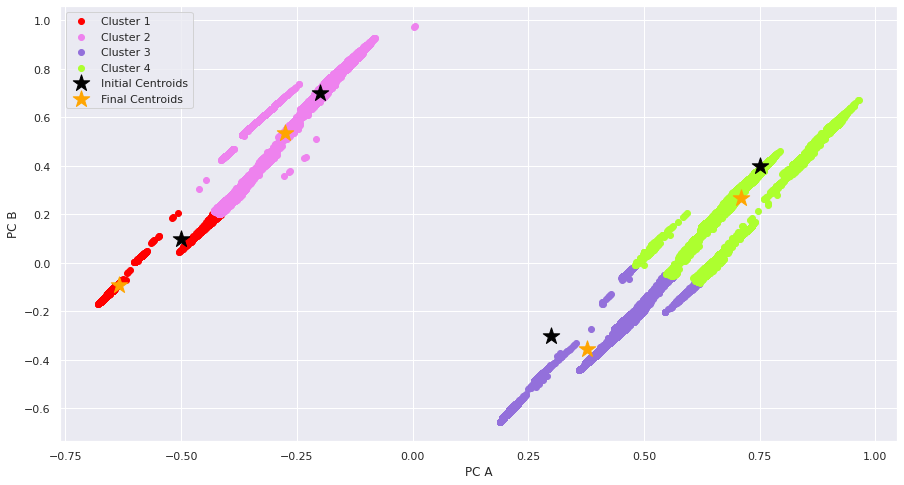

In [ ]:
k = 4
initial_centroids = np.asarray([[-0.5, 0.1], [-0.2, 0.7], [0.3, -0.3], [0.75, 0.4]])
cluster_test3, centroid_test3 = k_means(X, k, ini_cent=initial_centroids, random=False)

## Evaluasi (Elbow Method)

####Elbow Method

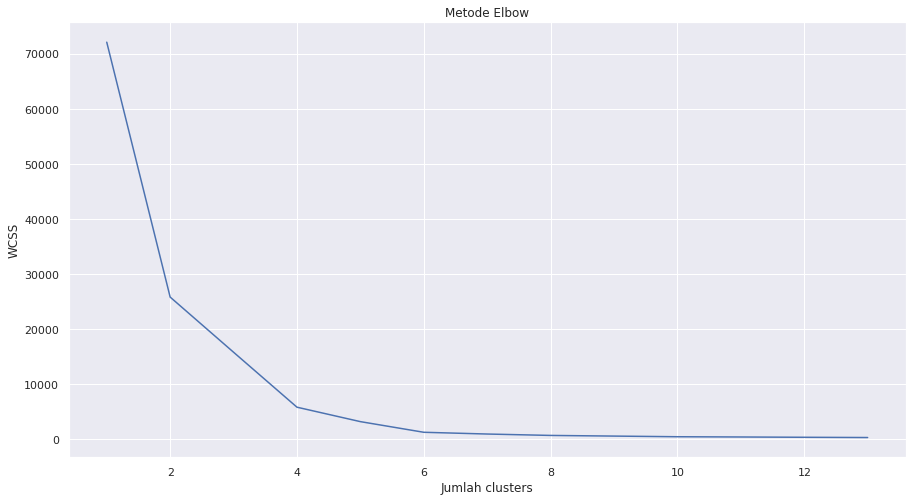

In [111]:
#nyoba
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 90)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 14), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

#Unused

**Manual / From Scratch**

In [ ]:
# def calculate_wcss(x, centroids, cluster):
#   sum = 0
#   for i, val in enumerate(x):
#     bag1 = (centroids[cluster[i]][0]-val[0])**2
#     bag2 = (centroids[cluster[i]][1]-val[1])** 2
#     sum = sum + np.sqrt(bag1 + bag2)
#   return sum

In [ ]:
# cost_list = []
# for i in range(1, 9):
#   print('Iterasi ke ', i)
#   cost = 0
#   clu, cen = k_means(X, int(i), show_plots=False)
#   cost = calculate_wcss(X, cen, clu)
#   cost_list.append(cost)

Iterasi ke  1
Iterasi ke  2
Iterasi ke  3
Iterasi ke  4
Iterasi ke  5
Iterasi ke  6
Iterasi ke  7
Iterasi ke  8


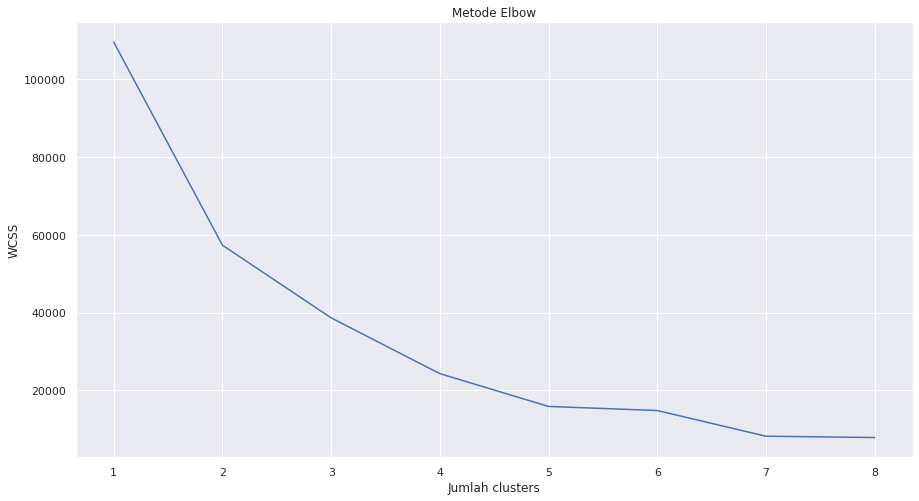

[109501.72831802245, 57329.15934117914, 38660.5225201062, 24320.952630235548, 15901.803028151275, 14848.959111682181, 8252.011626750358, 7907.6377406134525]


In [ ]:
# plt.plot(range(1, 9), cost_list)
# plt.title('Metode Elbow')
# plt.xlabel('Jumlah clusters')
# plt.ylabel('WCSS')
# plt.show()
# print(cost_list)

In [ ]:
# labels=['cluster 1','cluster 2','cluster 3']
# cols ={0:'r', 1:'b' ,2:'g' , 3:'coral', 4:'c', 5:'lime'}

# u_cluster = np.unique(cluster)
# for i in u_cluster:
#   plt.scatter(X[cluster == i, 0], X[cluster == i , 1] , label = labels[i], color=cols[i])
# #plt.scatter(X[:, 0], X[:, 1], c=cluster, cmap='plasma')
# plt.scatter(centroid[:,0],centroid[:,1],s=300,c='yellow',label='Final Centroids')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend()
# plt.show()

In [ ]:
# #Algoritma PCA untuk mereduksi dimensi
# def PCA(X , num_components):
     
#     #Langkah- 1
#     X_mean = X - np.mean(X , axis = 0)
     
#     #Langkah- 1
#     cov_mattrix = np.cov(X_mean , rowvar = False)
     
#     #Langkah- 1
#     eigen_values , eigen_vectors = np.linalg.eigh(cov_mattrix)
     
#     #Langkah- 1
#     sorted_index = np.argsort(eigen_values)[::-1]
#     sorted_eigenvalue = eigen_values[sorted_index]
#     sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
#     #Langkah- 1
#     eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
#     #Langkah- 1
#     X_reduced = np.dot(eigenvector_subset.transpose() , X_mean.transpose() ).transpose()
     
#     return X_reduced

In [ ]:
# from sklearn.cluster import KMeans
# km = KMeans(
#     n_clusters=3, init='random',
#     n_init=10, max_iter=300, 
#     tol=1e-04, random_state=0
# )
# y_km = km.fit_predict(X)

In [ ]:
# plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],c='blue')
# plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],c='red')
# plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1],c='green')
# print(y_km)
# plt.show()

In [ ]:
#print(X)
#print(centroid)
#print(np.asarray(ini_centroids))
#print(cluster)

In [ ]:
# plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
# plt.scatter(np.asarray(ini_centroids)[:,0],np.asarray(ini_centroids)[:,1],s=300,c='yellow',label='Centroids')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend()
# plt.title('Plot of data points')
# plt.show()

Melihat Korelasi Data

In [ ]:
# #digunakan untuk plot setiap cluster
# def show_clusters(X, clusters, centroids, ini_centroids, mark_centroid=True, show_ini_centroid=True, show_plots=True):
#   #assigning specific color to each cluster. Assuming 3 for now
#   cols ={0:'r', 1:'b' ,2:'g' , 3:'coral', 4:'c', 5:'lime'}
#   fig, ax = plt.subplots(figsize=(7.5, 6))
#   #plots every cluster points
#   for i in range(len(clusters)):
#     ax.scatter(X[i][0], X[i][1], color=cols[clusters[i]])
#   #plots all the centroids
#   for j in range(len(centroids)):
#     ax.scatter(centroids[j][0], centroids[j][1], marker='*', color=cols[j])
#     if show_ini_centroid==True:
#       ax.scatter(ini_centroids[j][0], ini_centroids[j][1], marker="+", s=150, color=cols[j])
#   #used to mark the centroid by drawing a circly arrount it
#   if mark_centroid == True:
#     for i in range(len(centroids)):
#       ax.add_artist(plt.Circle((centroids[i][0], centroids[i][1]), 0.4, linewidth=2, color='black', fill=False))
#       if show_ini_centroid==True:
#         ax.add_artist(plt.Circle((ini_centroids[i][0], ini_centroids[i][1]), 0.4, linewidth=2, color='y', fill=False))
#   ax.set_xlabel("Feature 1")
#   ax.set_ylabel("Feature 2")
#   ax.set_title("K-Means Clustering")
#   if show_plots==True:
#     plt.show()

In [ ]:
# #COBA
# k = 3
# X, original_clus = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

# plot_data(X)
# #print(X)

In [ ]:
# cluster, centroid = k_means(X, k)
# test = random_centroid(X, k)
# print(np.asarray(test))

In [117]:
# #4
# print(wcss[2]-wcss[3])
# print(wcss[3]-wcss[4])
# #6
# print(wcss[4]-wcss[5])
# print(wcss[6]-wcss[5])

9985.47571713671
2622.6083612385005
1934.5274517639075
-317.62349361805957


In [ ]:
# for k in range(2, 8):
#   KMean= KMeans(n_clusters = k)
#   KMean.fit(X)
#   label=KMean.predict(X)

#   print(f'Silhouette Score(k={k}): {silhouette_score(X, label)}')

Silhouette Score(k=2): 0.6377015761197838
Silhouette Score(k=3): 0.6484333719231122
Silhouette Score(k=4): 0.7216289632680609
Silhouette Score(k=5): 0.766843310075987
Silhouette Score(k=6): 0.8170683436716927
Silhouette Score(k=7): 0.8046778309816326


In [108]:
# silh_score = []
# for k in range(2, 8):
#   KMean= KMeans(n_clusters = k, init = 'k-means++', random_state = 90)
#   KMean.fit(X)
#   label=KMean.predict(X)
#   score = silhouette_score(X, label)
#   silh_score.append(score)
#   print(f'Silhouette Score(k={k}): {score}')

Silhouette Score(k=2): 0.6377015761207503
Silhouette Score(k=3): 0.6484333719281082
Silhouette Score(k=4): 0.7216334531415625
Silhouette Score(k=5): 0.7668387927364272
Silhouette Score(k=6): 0.8170683436787661
Silhouette Score(k=7): 0.8046841124808047


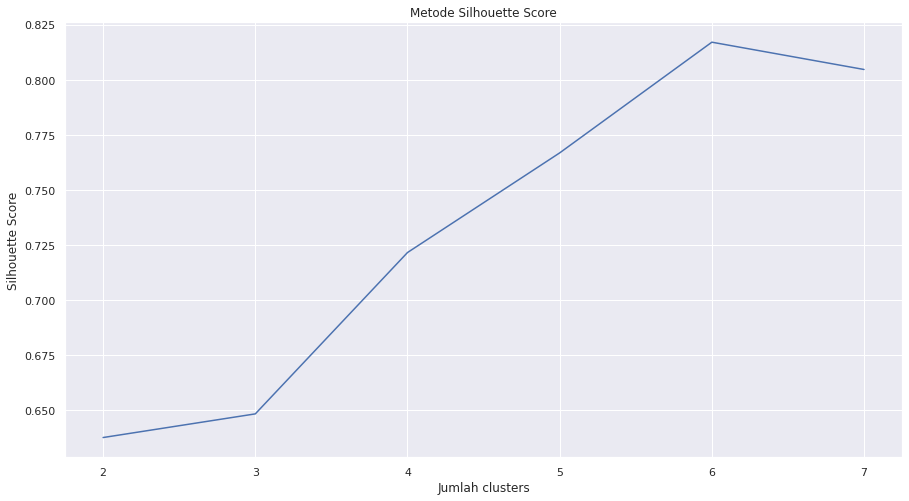

In [109]:
# plt.plot(range(2, 8), silh_score)
# plt.title('Metode Silhouette Score')
# plt.xlabel('Jumlah clusters')
# plt.ylabel('Silhouette Score')
# plt.show()